### EDA: Análisis contexto socioeconómico de estudiantes que realizaron el ICFES entre el 2020 y 2022

__Autora__: Ibeth Karine Terán Enríquez

__Fecha última actualización__: 01/10/2023

# Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

## Fase 1: obtener e inspeccionar archivos

A partir del contexto propuesto, se quieren análizar como variables relacionadas principalmente con como emplean el tiempo los estudiantes, así como con la influencia de su entorno familiar (existencia de libros en el hogar, estudios de los padres, entre otras), inciden en los resultados del puntaje global que obtienen los estudiantes en los segundos periodos para los años 2020, 2021 y 2022

### Cargue de librerias

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
import missingno as msno
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.display import Image
from IPython.display import display, HTML
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import panel as pn
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interactive, Layout
import plotly.express as px
import panel as pn
import holoviews as hv
import hvplot.pandas
%matplotlib inline

### Extracción de datos

In [ ]:
os.chdir(r'../Data/2_Ifces')

Se descargaron los datos de 2020, 2021 y 2022 para el segundo periodo, utilizando el portal del ICFES.

Para mayor facilidad se utilizan los archivos de muestra (10% de todos los datos) o todos los datos.

In [ ]:
## Las lineas utilizadas para obtener la muestra son: 
## Se realizó algo similar con los años 2021 y 2020
# datos_2020_muestra = datos_2020.sample(frac=0.1, replace=True, random_state=1)
# datos_2020_muestra.to_excel("2020_muestra.xlsx", sheet_name='Datos_2020', index=False)

In [ ]:
# Muestra
df_2020 = pd.read_excel('2020_muestra.xlsx', header=0, sheet_name='Datos_2020', dtype={'ESTU_HORASSEMANATRABAJA': str})
df_2021 = pd.read_excel('2021_muestra.xlsx', header=0, sheet_name='Datos_2021', dtype={'ESTU_HORASSEMANATRABAJA': str})
df_2022 = pd.read_excel('2022_muestra.xlsx', header=0, sheet_name='Datos_2022', dtype={'ESTU_HORASSEMANATRABAJA': str})

In [ ]:
df_2020.head()
df_2021.head()
df_2022.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,2006-07-06 00:00:00,20224,SB11202240418350,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,56,3,73,265,61.0,NaN,5.491110e+14,3.0,2.0,PUBLICAR
1,TI,COLOMBIA,F,2004-11-01 00:00:00,20224,SB11202240025770,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,...,31,1,8,175,7.0,NaN,4.339269e+14,2.0,2.0,PUBLICAR
2,TI,COLOMBIA,M,2006-02-12 00:00:00,20224,SB11202240175093,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,...,51,2,60,258,57.0,NaN,4.481495e+14,2.0,2.0,PUBLICAR
3,TI,COLOMBIA,M,2005-12-21 00:00:00,20224,SB11202240049747,ESTUDIANTE,COLOMBIA,No,HUILA,...,70,3,97,343,96.0,NaN,6.279630e+14,3.0,3.0,PUBLICAR
4,TI,COLOMBIA,F,2005-04-29 00:00:00,20224,SB11202240147320,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,44,2,42,208,24.0,NaN,5.374679e+13,3.0,2.0,PUBLICAR


Los datos de 2020 y 2022 tienen 81 columnas, mientras que los datos de 2021 tiene 82 columnas

Se hace una concatenación de los dataframes para obtener uno solo que contenga a todos los años

In [ ]:
df_todos = pd.concat([df_2020, df_2021, df_2022], keys = ['2020', "2021", "2022"], axis = 0)
df_todos

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
2020 0                     TI          COLOMBIA           F   
     1                     TI          COLOMBIA           F   
     2                     TI          COLOMBIA           F   
     3                     TI          COLOMBIA           M   
     4                     TI          COLOMBIA           F   
...                       ...               ...         ...   
2022 53274                 TI          COLOMBIA           M   
     53275                 CC          COLOMBIA           F   
     53276                 TI          COLOMBIA           M   
     53277                 TI          COLOMBIA           F   
     53278                 TI          COLOMBIA           F   

           ESTU_FECHANACIMIENTO  PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE  \
2020 0      2004-07-12 00:00:00    20204  SB11202040071340      ESTUDIANTE   
     1      2004-06-04 00:00:00    20204  SB11202040045632      ESTUDIANTE   
     2      2004-01-13 00:00:00    20204  SB11202040223064      ESTUDIANTE   
     3      2001-04-30 00:00:00    20204  SB11202040276256      ESTUDIANTE   
     4      2003-02-19 00:00:00    20204  SB11202040021168      ESTUDIANTE   
...                         ...      ...               ...             ...   
2022 53274  2003-10-16 00:00:00    20224  SB11202240406789      ESTUDIANTE   
     53275  2004-05-10 00:00:00    20224  SB11202240428530      ESTUDIANTE   
     53276  2005-10-26 00:00:00    20224  SB11202240024262      ESTUDIANTE   
     53277  2006-06-12 00:00:00    20224  SB11202240379502      ESTUDIANTE   
     53278  2005-11-03 00:00:00    20224  SB11202240210269      ESTUDIANTE   

           ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_DEPTO_RESIDE  ...  \
2020 0             COLOMBIA              No         SANTANDER  ...   
     1             COLOMBIA              No             HUILA  ...   
     2             COLOMBIA              No              META  ...   
     3             COLOMBIA              No      CUNDINAMARCA  ...   
     4             COLOMBIA              No            BOGOTÁ  ...   
...                     ...             ...               ...  ...   
2022 53274         COLOMBIA              No           BOLIVAR  ...   
     53275         COLOMBIA              No         ATLANTICO  ...   
     53276         COLOMBIA              No         ANTIOQUIA  ...   
     53277         COLOMBIA              No            BOYACA  ...   
     53278         COLOMBIA              No            BOGOTÁ  ...   

            PERCENTIL_INGLES DESEMP_INGLES  PUNT_GLOBAL PERCENTIL_GLOBAL  \
2020 0                  74.0            A1          257             58.0   
     1                  99.0            B1          347             98.0   
     2                  25.0            A-          245             50.0   
     3                  42.0            A-          168              3.0   
     4                  93.0            A2          351             98.0   
...                      ...           ...          ...              ...   
2022 53274              48.0            A1          254             54.0   
     53275              75.0            A2          297             80.0   
     53276              99.0            B+          357             98.0   
     53277              54.0            A1          197             17.0   
     53278              69.0            A1          290             77.0   

           ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
2020 0             5.845096e+14                 3.0                      3.0   
     1             5.243966e+13                 3.0                      3.0   
     2             5.250529e+14                 3.0                      3.0   
     3             4.397998e+14                 2.0                      2.0   
     4             5.541950e+14                 3.0                      3.0   
...                         ...                 ...                      ...   
202

### Exploración de los datos

In [8]:
def datos_faltantes(df):
    lista_col_nan = []
    lista_col_nan_cant = []
    lista_col_nan_porc = []
    for colm in df.columns:
        cant = df[str(colm)].isna().sum()
        if cant > 0:
            lista_col_nan.append(colm)
            lista_col_nan_cant.append(cant)
            lista_col_nan_porc.append((cant/df_todos.shape[0])*100)
            df_col_nan = pd.DataFrame({'Column': lista_col_nan, 'No_Dat_NaN': lista_col_nan_cant, 
                                       'Porc_Dat_NaN(%)': lista_col_nan_porc})
            df_coln_ord_desc = df_col_nan.sort_values(by='No_Dat_NaN', ascending=False)
    return df_coln_ord_desc

def imputacion_datos(df_imp):
    df_imp_c = df_imp.copy()

    list_var_met1 = ['ESTU_DEPTO_RESIDE','COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_BILINGUE', 'COLE_CARACTER', 
                     'COLE_AREA_UBICACION']

    list_var_met2 = ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 
                     'FAMI_TIENECOMPUTADOR', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS',
                     'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA', 
                     'FAMI_SITUACIONECONOMICA', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']

    df_con_nan = df_imp_c[df_imp_c[list_var_met2].isna().any(axis=1)]
    val_unicos = df_con_nan['COLE_COD_DANE_ESTABLECIMIENTO'].unique()
    df_modas_dane = pd.DataFrame(val_unicos, columns=['COLE_COD_DANE_ESTABLECIMIENTO'])

        # Datos cualitativos
    for colm in df_imp_c.columns:
        # Si hay un valor NaN en la columna de genero se va a reemplazar con F. Para esta asunción se tuvo en cuenta los 
        # datos históricos del ICFES
        if colm == 'ESTU_GENERO':
            df_imp_c.loc[df_imp_c['ESTU_GENERO'].isnull(), 'ESTU_GENERO'] = 'F'
        # Met1: Buscar con el código DANE campos que otro registro si tenga
        elif colm in list_var_met1:
            df_sin_nan_imputc = df_imp_c.dropna(subset=[colm, 'COLE_COD_DANE_ESTABLECIMIENTO'])
            df_val_unic_imputc = df_sin_nan_imputc[[colm, 'COLE_COD_DANE_ESTABLECIMIENTO']].drop_duplicates()
            dicc_reemplz = df_val_unic_imputc.set_index('COLE_COD_DANE_ESTABLECIMIENTO')[colm].to_dict()
            # Reemplazar los valores NaN en la columna X de df1 usando el diccionario de reemplazo
            df_imp_c[colm] = df_imp_c[colm].fillna(df_imp_c['COLE_COD_DANE_ESTABLECIMIENTO'].map(dicc_reemplz))
        # Met2: Hacer un filtrado por cada colegio y reemplazar con el valor de la moda los campos de datos faltantes 
        # para estudiantes de dicho colegio
        elif colm in list_var_met2:
            lis_mod_dane = []
            for dane in val_unicos:
                df_filtrado = df_imp_c[df_imp_c['COLE_COD_DANE_ESTABLECIMIENTO'] == dane]
                if len(df_filtrado) > 0:
                    moda_col_imp = df_filtrado[colm].mode()
                    if len(moda_col_imp) > 0:
                        lis_mod_dane.append(moda_col_imp[0])
                    else:
                        lis_mod_dane.append(pd.NA)  
                else:
                    lis_mod_dane.append(pd.NA)
            df_modas_dane[colm] = lis_mod_dane
            dicc_reemplz2 = df_modas_dane.set_index('COLE_COD_DANE_ESTABLECIMIENTO')[colm].to_dict()
            # Reemplazar los valores NaN en la columna X de df1 usando el diccionario de reemplazo
            df_imp_c[colm] = df_imp_c[colm].fillna(df_imp_c['COLE_COD_DANE_ESTABLECIMIENTO'].map(dicc_reemplz2))
        else:
            pass

    return df_imp_c

def imputacion_col_bil(df_con_imp_drop_c):
    df_nan_col_bilingue = df_con_imp_drop_c.loc[df_con_imp_drop_c['COLE_BILINGUE'].isna()]
    df_imp_col_bilingue = df_nan_col_bilingue[['COLE_COD_DANE_ESTABLECIMIENTO','PUNT_INGLES', 'COLE_BILINGUE']]
    val_unicos_dane_bil = df_imp_col_bilingue['COLE_COD_DANE_ESTABLECIMIENTO'].unique()
    list_mean_pun_ingl = []
    list_dane_bil = []
    
    for dane_bil in val_unicos_dane_bil:
        list_dane_bil.append(dane_bil)
        df_filtrado_bil = df_imp_col_bilingue[df_imp_col_bilingue['COLE_COD_DANE_ESTABLECIMIENTO'] == dane_bil]
        if len(df_filtrado_bil) > 0:
            mean_pun_ingl = df_filtrado_bil['PUNT_INGLES'].mean()
            if mean_pun_ingl > 68:
                list_mean_pun_ingl.append('S')
            else:
                list_mean_pun_ingl.append('N') 
        else:
            list_mean_pun_ingl.append(pd.NA)
    
    # Reemplazar los valores NaN en la columna X de df1 usando el diccionario de reemplazo
    dicc_reemplz_bil = dict(zip(list_dane_bil, list_mean_pun_ingl))
    df_con_imp_drop_c['COLE_BILINGUE'] = df_con_imp_drop_c['COLE_BILINGUE'].fillna(df_con_imp_drop_c['COLE_COD_DANE_ESTABLECIMIENTO'].map(dicc_reemplz_bil))
    
    return df_con_imp_drop_c

Conocer el tipo y nombre de las variables

In [9]:
tipos = df_todos.dtypes
print(tipos)
print('La mayoria de las columnas son de tipo object y algunas son de tipo float64 e int64\n')
# Dimensiones
dimensiones = df_todos.shape
print("Número de filas (estudiantes):", dimensiones[0])
print("Número de columnas (variables):", dimensiones[1])

# Nombres de la columnas
columnas = df_todos.columns
columnas

ESTU_TIPODOCUMENTO            object
ESTU_NACIONALIDAD             object
ESTU_GENERO                   object
ESTU_FECHANACIMIENTO          object
PERIODO                        int64
                              ...   
ESTU_NSE_INDIVIDUAL          float64
ESTU_NSE_ESTABLECIMIENTO     float64
ESTU_ESTADOINVESTIGACION      object
ESTU_GENERACION-E             object
PERCENTIL_ESPECIAL_GLOBAL    float64
Length: 82, dtype: object
La mayoria de las columnas son de tipo object y algunas son de tipo float64 e int64

Número de filas (estudiantes): 157064
Número de columnas (variables): 82


Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


### Variables de interés
Se van a utilizar las siguientes variables de interés para iniciar el análisis:

###### Estudiante (7)
* ESTU_GENERO
* ESTU_DEPTO_RESIDE
* ESTU_DEDICACIONLECTURADIARIA
* ESTU_DEDICACIONINTERNET
* ESTU_HORASSEMANATRABAJA
* ESTU_NSE_INDIVIDUAL

###### Familia (11)
* FAMI_EDUCACIONPADRE
* FAMI_EDUCACIONMADRE
* FAMI_ESTRATOVIVIENDA
* FAMI_TIENEINTERNET
* FAMI_TIENECOMPUTADOR
* FAMI_TIENESERVICIOTV
* FAMI_TIENECONSOLAVIDEOJUEGOS
* FAMI_NUMLIBROS
* FAMI_TRABAJOLABORPADRE
* FAMI_TRABAJOLABORMADRE
* FAMI_SITUACIONECONOMICA

###### Colegio (5)
* COLE_JORNADA
* COLE_NATURALEZA
* COLE_BILINGUE
* COLE_CARACTER
* COLE_AREA_UBICACION

###### Puntaje (7)
* 'PUNT_LECTURA_CRITICA'
* 'PUNT_MATEMATICAS'
* 'PUNT_C_NATURALES'
* 'PUNT_SOCIALES_CIUDADANAS'
* 'PUNT_INGLES'
* 'PUNT_GLOBAL'
* 'PERCENTIL_GLOBAL'

Se agregan otras columnas como COLE_COD_DANE_SEDE, las cuales van a servir posteriormente para trabajar con los datos faltantes

In [10]:
col_estu = ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET',
            'ESTU_HORASSEMANATRABAJA', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']

col_fami = ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 
            'FAMI_TIENECOMPUTADOR','FAMI_TIENESERVICIOTV', 'FAMI_TIENECONSOLAVIDEOJUEGOS',  'FAMI_NUMLIBROS', 
            'FAMI_SITUACIONECONOMICA']

col_cole = ['COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_BILINGUE',
            'COLE_AREA_UBICACION']

col_puntaje = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
               'PUNT_INGLES', 'PUNT_GLOBAL']

col_int = col_estu + col_fami + col_cole + col_puntaje
df_todos_final = df_todos[col_int]
df_todos_final

ESTU_GENERO ESTU_DEPTO_RESIDE ESTU_DEDICACIONLECTURADIARIA  \
2020 0               F         SANTANDER            Entre 1 y 2 horas   
     1               F             HUILA        Entre 30 y 60 minutos   
     2               F              META   No leo por entretenimiento   
     3               M      CUNDINAMARCA           30 minutos o menos   
     4               F            BOGOTÁ        Entre 30 y 60 minutos   
...                ...               ...                          ...   
2022 53274           M           BOLIVAR           30 minutos o menos   
     53275           F         ATLANTICO               Más de 2 horas   
     53276           M         ANTIOQUIA        Entre 30 y 60 minutos   
     53277           F            BOYACA        Entre 30 y 60 minutos   
     53278           F            BOGOTÁ           30 minutos o menos   

           ESTU_DEDICACIONINTERNET ESTU_HORASSEMANATRABAJA  \
2020 0           Entre 1 y 3 horas                       0   
     1          30 minutos o menos                       0   
     2              Más de 3 horas                       0   
     3              Más de 3 horas       Menos de 10 horas   
     4           Entre 1 y 3 horas                       0   
...                            ...                     ...   
2022 53274       Entre 1 y 3 horas                       0   
     53275          Más de 3 horas                       0   
     53276      30 minutos o menos                       0   
     53277       Entre 1 y 3 horas                       0   
     53278   Entre 30 y 60 minutos                       0   

            ESTU_NSE_INDIVIDUAL  ESTU_NSE_ESTABLECIMIENTO  \
2020 0                      3.0                       3.0   
     1                      3.0                       3.0   
     2                      3.0                       3.0   
     3                      2.0                       2.0   
     4                      3.0                       3.0   
...                         ...                       ...   
2022 53274                  2.0                       2.0   
     53275                  2.0                       2.0   
     53276                  3.0                       4.0   
     53277                  3.0                       2.0   
     53278                  3.0                       3.0   

                           FAMI_EDUCACIONPADRE  \
2020 0          Técnica o tecnológica completa   
     1                       Primaria completa   
     2          Educación profesional completa   
     3                     Primaria incompleta   
     4      Secundaria (Bachillerato) completa   
...                                        ...   
2022 53274  Secundaria (Bachillerato) completa   
     53275  Secundaria (Bachillerato) completa   
     53276                             No sabe   
     53277      Educación profesional completa   
     53278  Secundaria (Bachillerato) completa   

                             FAMI_EDUCACIONMADRE FAMI_ESTRATOVIVIENDA  ...  \
2020 0            Educación profesional completa            Estrato 3  ...   
     1        Secundaria (Bachillerato) completa            Estrato 3  ...   
     2            Educación profesional completa            Estrato 2  ...   
     3                         Primaria completa            Estrato 1  ...   
     4            Técnica o tecnológica completa            Estrato 3  ...   
...                                          ...                  ...  ...   
2022 53274        Educación profesional completa            Estrato 1  ...   
     53275  Secundaria (Bachillerato) incompleta            Estrato 2  ...   
     53276                               No sabe            Estrato 4  ...   
     53277  Secundaria (Bachillerato) incompleta            Estrato 1  ...   
     53278    Secundaria (Bachillerato) completa            Estrato 2  ...   

           COLE_JORNADA COLE_NATURALEZA COLE_BILINGUE COLE_AREA_UBICACION  \
2020 0           MAÑANA         OFICIAL  

### Datos faltantes

Se visualizan, contabilizan y se realiza un tratamiento a los datos faltantes

<AxesSubplot:>

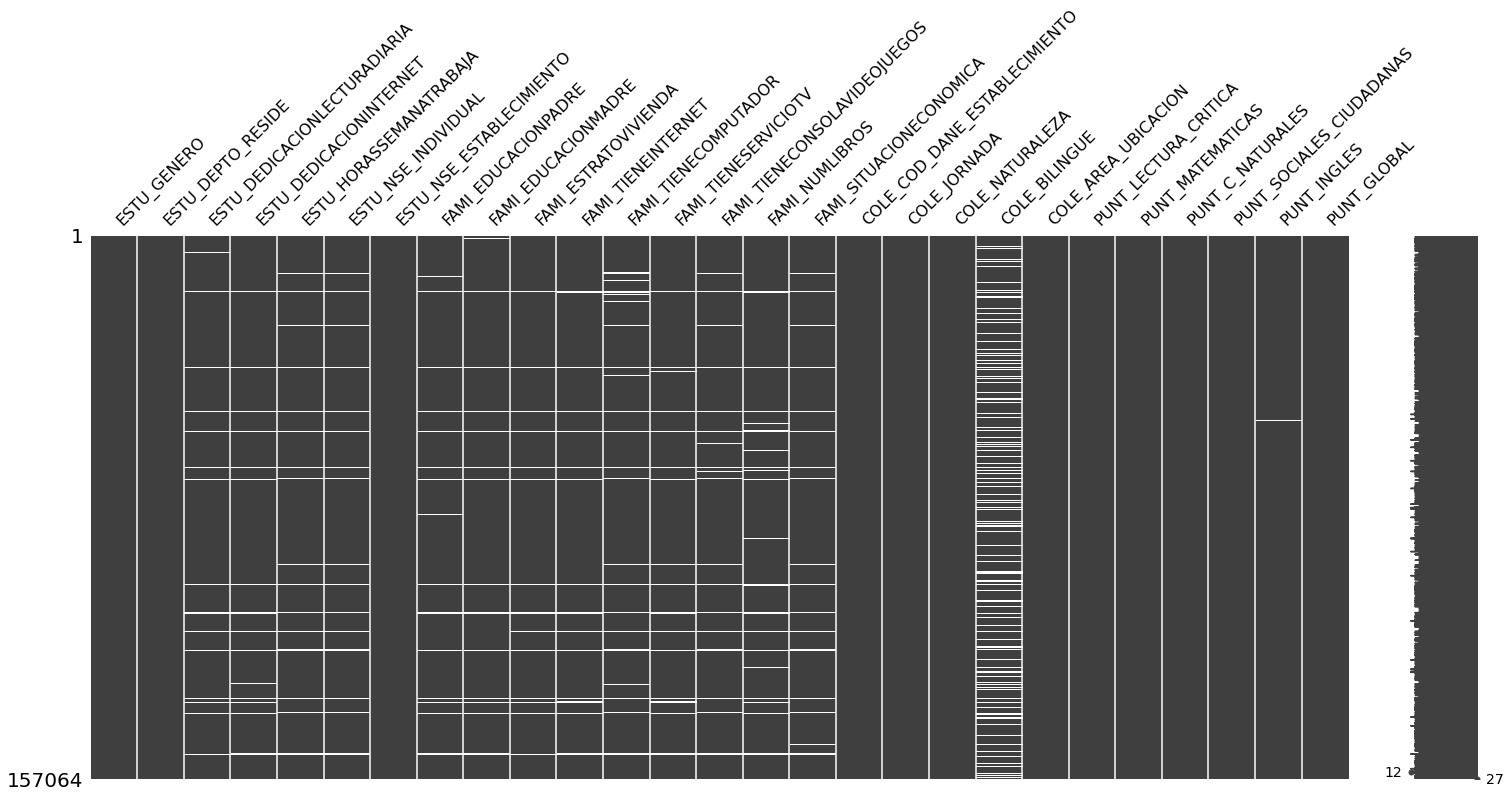

In [11]:
msno.matrix(df_todos_final)

A continuación se llama la función `datos_faltantes` para obtener la cantidad y porcentaje de datos faltantes en cada columna

In [12]:
# Columnas con datos faltantes
col_nan = datos_faltantes(df_todos_final)
print(f'Columnas con datos faltantes: {len(col_nan)}\n\n{col_nan}')

Columnas con datos faltantes: 18

                          Column  No_Dat_NaN  Porc_Dat_NaN(%)
16                 COLE_BILINGUE       27141        17.280217
14                FAMI_NUMLIBROS       10323         6.572480
9           FAMI_ESTRATOVIVIENDA        8248         5.251363
3        ESTU_DEDICACIONINTERNET        7580         4.826058
12          FAMI_TIENESERVICIOTV        7541         4.801228
2   ESTU_DEDICACIONLECTURADIARIA        7411         4.718459
10            FAMI_TIENEINTERNET        7154         4.554831
8            FAMI_EDUCACIONMADRE        7049         4.487979
7            FAMI_EDUCACIONPADRE        7021         4.470152
11          FAMI_TIENECOMPUTADOR        6017         3.830922
13  FAMI_TIENECONSOLAVIDEOJUEGOS        5982         3.808639
15       FAMI_SITUACIONECONOMICA        5878         3.742423
4        ESTU_HORASSEMANATRABAJA        5713         3.637371
5            ESTU_NSE_INDIVIDUAL        5251         3.343223
17                   PUNT_INGLES    

Se destacan algunas filas, las cuales tienen datos faltantes en varias columnas de datos demográficos, por lo que se procede a eliminarlas. Se realiza esto porque aunque se trabajen los datos van a ser registros con baja confiabilidad, lo que puede inducir a errores.

<AxesSubplot:>

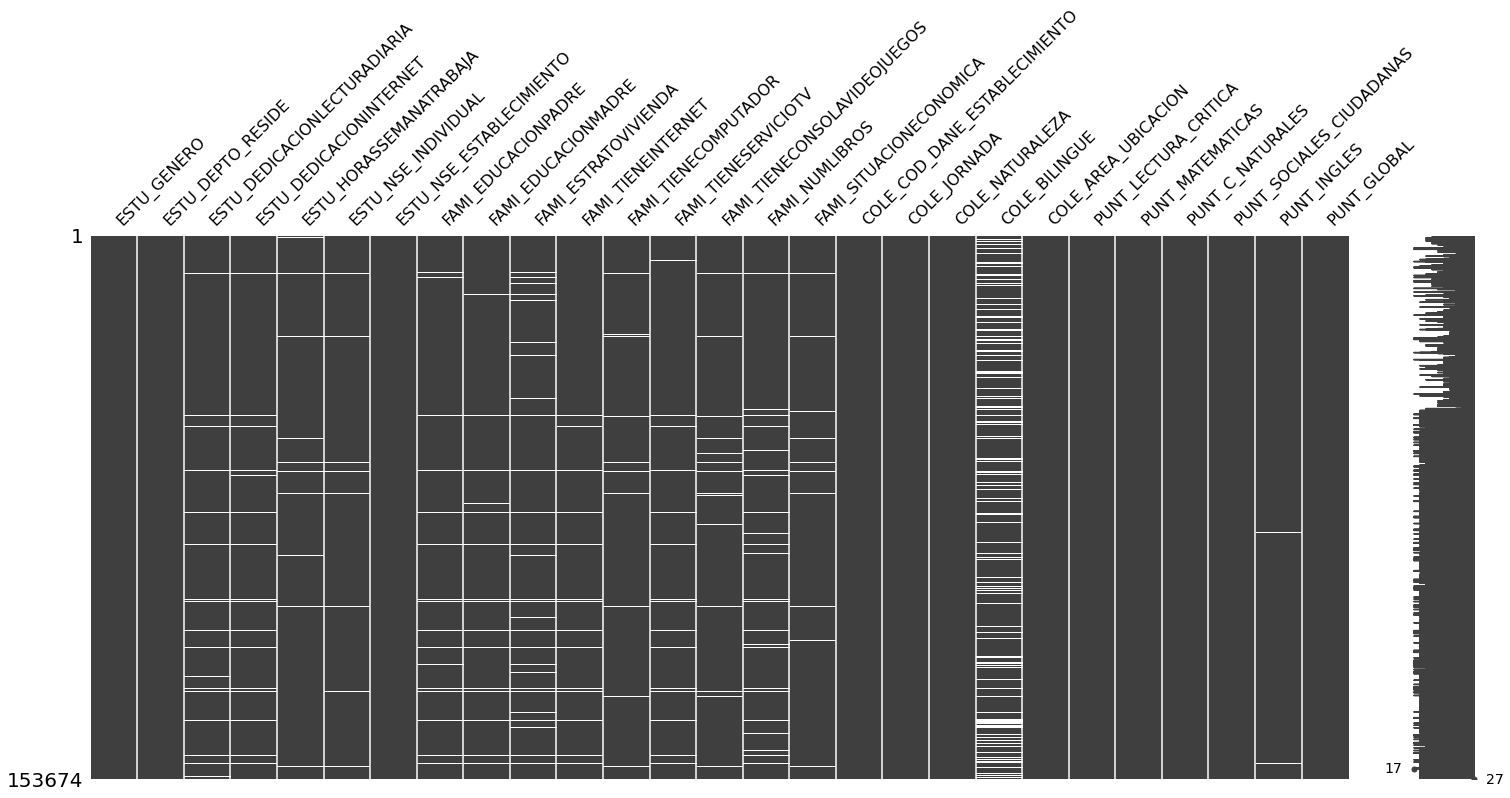

In [13]:
# Se eliminan las filas que tengan menos de 19 valores NaN
df_sin_nan_vi = df_todos_final.dropna(thresh=(len(df_todos_final.columns)-10))
msno.matrix(df_sin_nan_vi)

In [14]:
col_nan_v2 = datos_faltantes(df_sin_nan_vi)
print(f'Columnas con datos faltantes: {len(col_nan_v2)}\n\n{col_nan_v2}')

Columnas con datos faltantes: 16

                          Column  No_Dat_NaN  Porc_Dat_NaN(%)
14                 COLE_BILINGUE       26412        16.816075
12                FAMI_NUMLIBROS        6940         4.418581
7           FAMI_ESTRATOVIVIENDA        4871         3.101284
2        ESTU_DEDICACIONINTERNET        4200         2.674069
10          FAMI_TIENESERVICIOTV        4157         2.646692
1   ESTU_DEDICACIONLECTURADIARIA        4028         2.564560
8             FAMI_TIENEINTERNET        3773         2.402205
5            FAMI_EDUCACIONPADRE        3699         2.355091
6            FAMI_EDUCACIONMADRE        3699         2.355091
9           FAMI_TIENECOMPUTADOR        2661         1.694214
11  FAMI_TIENECONSOLAVIDEOJUEGOS        2620         1.668110
13       FAMI_SITUACIONECONOMICA        2546         1.620995
3        ESTU_HORASSEMANATRABAJA        2385         1.518489
4            ESTU_NSE_INDIVIDUAL        1867         1.188687
15                   PUNT_INGLES    

### Inputación de datos

Inicialmente, se realiza la imputación utilizando dos métodos:
1. MÉTODO 1: Se completan las columnas de la lista `list_var_met1` (ver apartado de funciones), buscando los valores correspondientes en otro registro a través del 'COLE_COD_DANE_ESTABLECIMIENTO'.

2. MÉTODO 2: Para las columnas de la lista `list_var_met2` que corresponden a variables cualitativas, se filtra inicialmente por el 'COLE_COD_DANE_ESTABLECIMIENTO' para obtener la media de dicha columna. Es decir se completan los datos de acuerdo a las condiciones del establecimiento.

In [15]:
df_imp = df_sin_nan_vi.copy()
df_con_imp = imputacion_datos(df_imp)
col_nan_v2 = datos_faltantes(df_con_imp)
print(f'Columnas con datos faltantes: {len(col_nan_v2)}\n\n{col_nan_v2}')

Columnas con datos faltantes: 15

                          Column  No_Dat_NaN  Porc_Dat_NaN(%)
13                 COLE_BILINGUE       26412        16.816075
14                   PUNT_INGLES         580         0.369276
11                FAMI_NUMLIBROS          45         0.028651
6           FAMI_ESTRATOVIVIENDA          28         0.017827
9           FAMI_TIENESERVICIOTV          26         0.016554
7             FAMI_TIENEINTERNET          23         0.014644
1        ESTU_DEDICACIONINTERNET          22         0.014007
0   ESTU_DEDICACIONLECTURADIARIA          20         0.012734
4            FAMI_EDUCACIONPADRE          20         0.012734
5            FAMI_EDUCACIONMADRE          18         0.011460
10  FAMI_TIENECONSOLAVIDEOJUEGOS          13         0.008277
8           FAMI_TIENECOMPUTADOR          12         0.007640
12       FAMI_SITUACIONECONOMICA           8         0.005093
2        ESTU_HORASSEMANATRABAJA           7         0.004457
3            ESTU_NSE_INDIVIDUAL    

Si hay despues de implementar los métodos, hay datos faltantes en las columnas utilizadas en el método 2 de imputación de datos (excepto la columna 'COLE_BILINGUE'), se procede a eliminarlas, ya que, como se puede observar, representan un porcentaje muy pequeño.

In [16]:
col_nan_f = datos_faltantes(df_con_imp)
if len(col_nan_f.iloc[:, 0]) > 0: 
    list_col_nan = col_nan_f.iloc[:, 0].to_list()
    list_col_imp_met3 = ['COLE_BILINGUE']

    conj_col_nan = set(list_col_nan)
    conj_col_imp_met3 = set(list_col_imp_met3)

    col_fildrop = list(conj_col_nan.symmetric_difference(conj_col_imp_met3))
    df_con_imp_drop = df_con_imp.dropna(subset=col_fildrop)
else:
    pass

Es importante tratar los datos faltantes que restan de la columna 'COLE_BILINGUE', puesto que representa un porcentaje considerable de los datos, por lo que se utiliza la columna de 'PUNT_INGLES'. 

Para ello, se filtra de acuerdo al 'COLE_COD_DANE_ESTABLECIMIENTO' y se obtiene un promedio del 'PUNT_INGLES', para después asignarle el valor de 'S' a aquellos colegios que tienen un puntaje promedio mayor a 68 (Nivel B1), tomando como referencia los niveles de desempeño establecidos por el ICFES (https://www2.icfes.gov.co/documents/39286/2349876/Niveles+de+desempeno+prueba+de-ingles.pdf) y asumiendo que los colegios con nivel B1 son Bilingues; en caso contrario, se le asigna 'N' al colegio en la columna 'COLE_BILINGUE'.

Para evitar posibles errores, posteriormente, se reemplazan los valores de -1 en la columna de 'PUNT_INGLES' por 0, ya que de acuerdo al instructivo de datos del ICFES, los valores de -1 correspondiente a estudiantes que no contestaron ninguna pregunta.

In [17]:
df_con_imp_drop_c = df_con_imp_drop.copy()
df_con_imp_drop_c['PUNT_INGLES'] = df_con_imp_drop_c['PUNT_INGLES'].replace(-1, 0)

No hay datos faltantes


<AxesSubplot:>

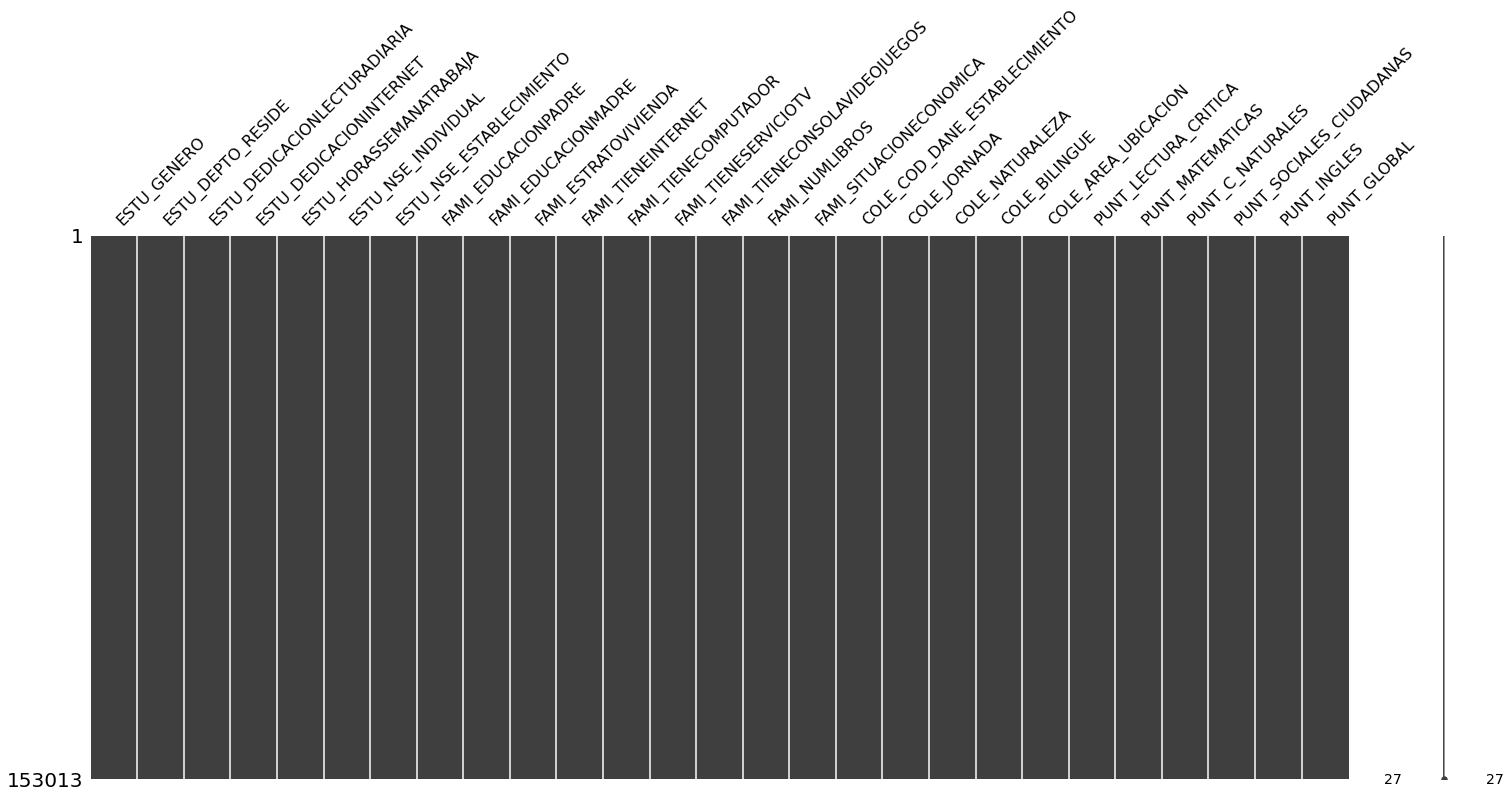

In [18]:
if df_con_imp_drop_c['COLE_BILINGUE'].isna().any() == True:
    df_con_imp_drop_c = imputacion_col_bil(df_con_imp_drop_c)

try:
    col_nan_f = datos_faltantes(df_con_imp_drop_c)
    print(f'Columnas con datos faltantes: {len(col_nan_f)}\n\n{col_nan_f}')    
except Exception as e:
    print("No hay datos faltantes")

msno.matrix(df_con_imp_drop_c)

Finalmente, se obtiene el dataframe sin datos faltante y se estima el porcentaje de datos eliminados para corroborar que se cuenta con una cantidad apreciable de datos

In [19]:
df_work = df_con_imp_drop_c.copy()
dimen_orig = df_todos.shape
dimen_final =  df_work.shape
porc_datos_work = ((dimen_final[0]*100)/dimen_orig[0])
print("Porcentaje de datos eliminados:", (round((100-porc_datos_work),2)), "%")

Porcentaje de datos eliminados: 2.58 %


El porcentaje de datos eliminados es muy bajo, por lo que se procede con la fase 2.

## Fase 2: identificar características y relaciones en las variables

In [20]:
def graf_sociodemogr(df_wk_sd):
    num_columnas = len(df_wk_sd.columns)
    num_filas = int(math.ceil(num_columnas / 2))
    num_columnas_subplot = min(num_columnas, 2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas_subplot, figsize=(20, 70))
    for i, columna in enumerate(df_wk_sd.columns):
        row = i // 2
        col = i % 2 

        moda = df_wk_sd[columna].mode().iloc[0] 
        if columna == 'ESTU_DEPTO_RESIDE':
            counts = df_wk_sd[columna].value_counts()
            axes[row, col].bar(counts.index, counts.values, color='orange')
            axes[row, col].set_title(f'GRÁFICO: {columna}\nModa: {moda}')
            axes[row, col].tick_params(axis='x', rotation=90)
        else:
            counts = df_wk_sd.groupby(columna).size()
            axes[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
            axes[row, col].set_title(f'GRÁFICO: {columna}\nModa: {moda}')

    plt.tight_layout()
    plt.show()
    
def punt_vs_sociodemogr(df_work, df_wk_sd):
    num_columnas = len(df_wk_sd.columns)
    num_filas = int(math.ceil(num_columnas / 2))
    num_columnas_subplot = min(num_columnas, 2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas_subplot, figsize=(15, 50))

    for i, columna in enumerate(df_wk_sd.columns):
        row = i // 2
        col = i % 2 
        if columna != 'PUNT_GLOBAL':
            sns.violinplot(x=columna, y='PUNT_GLOBAL', data=df_work, ax=axes[row, col])
            axes[row, col].set_title(f'GRÁFICO: {columna}')
            axes[row, col].tick_params(axis='x', rotation=90)
            axes[row, col].set_xlabel('')
        else:
            axes[row, col].axis('off') 
    plt.tight_layout()
    plt.show()
    
def histogr_puntaje(df_work_pun):
    # Extraer la columna de puntajes del DataFrame
    pun_globls = df_work_pun['PUNT_GLOBAL']

    mediana = pun_globls.median()
    media = pun_globls.mean()
    varianza = (round(pun_globls.var(),2))
    desviacion_estandar = (round(pun_globls.std(),2))
    
    plt.figure(figsize=(8, 6))
    plt.hist(pun_globls, bins=10, color='gray', alpha=0.7)
    plt.xlabel('Puntaje Global')
    plt.ylabel('Frecuencia')
    plt.title(f'HISTOGRAMA DE PUNTAJES GLOBALES\n\nVar: {varianza}')

    plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(media, color='blue', linestyle='dashed', linewidth=2, label=f'Media (μ): {media:.2f}')
    plt.axvline((desviacion_estandar+media), color='purple', linestyle='dashed', linewidth=2, label=f'μ ± σ: {desviacion_estandar:.2f}')
    plt.axvline((media-desviacion_estandar), color='purple', linestyle='dashed', linewidth=2)

    plt.legend()
    plt.show()

Se obtienen las gráficas de distribución de las variables y también se observa su comportamiento respecto al puntaje global para determinar sobre que variables se podria hacer un análisis más profundo. En este caso, se seleccionaron arbirariamente las siguientes variables.

In [21]:
columns_sociodemogr = ['ESTU_GENERO', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 
                       'ESTU_HORASSEMANATRABAJA', 'ESTU_DEPTO_RESIDE','FAMI_EDUCACIONPADRE', 
                       'FAMI_EDUCACIONMADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENESERVICIOTV',
                       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS','FAMI_SITUACIONECONOMICA',
                       'COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_BILINGUE','COLE_AREA_UBICACION', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']

columns_punt = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 
                'PUNT_INGLES','PUNT_GLOBAL']

In [22]:
df_wk_sd = df_work[columns_sociodemogr]

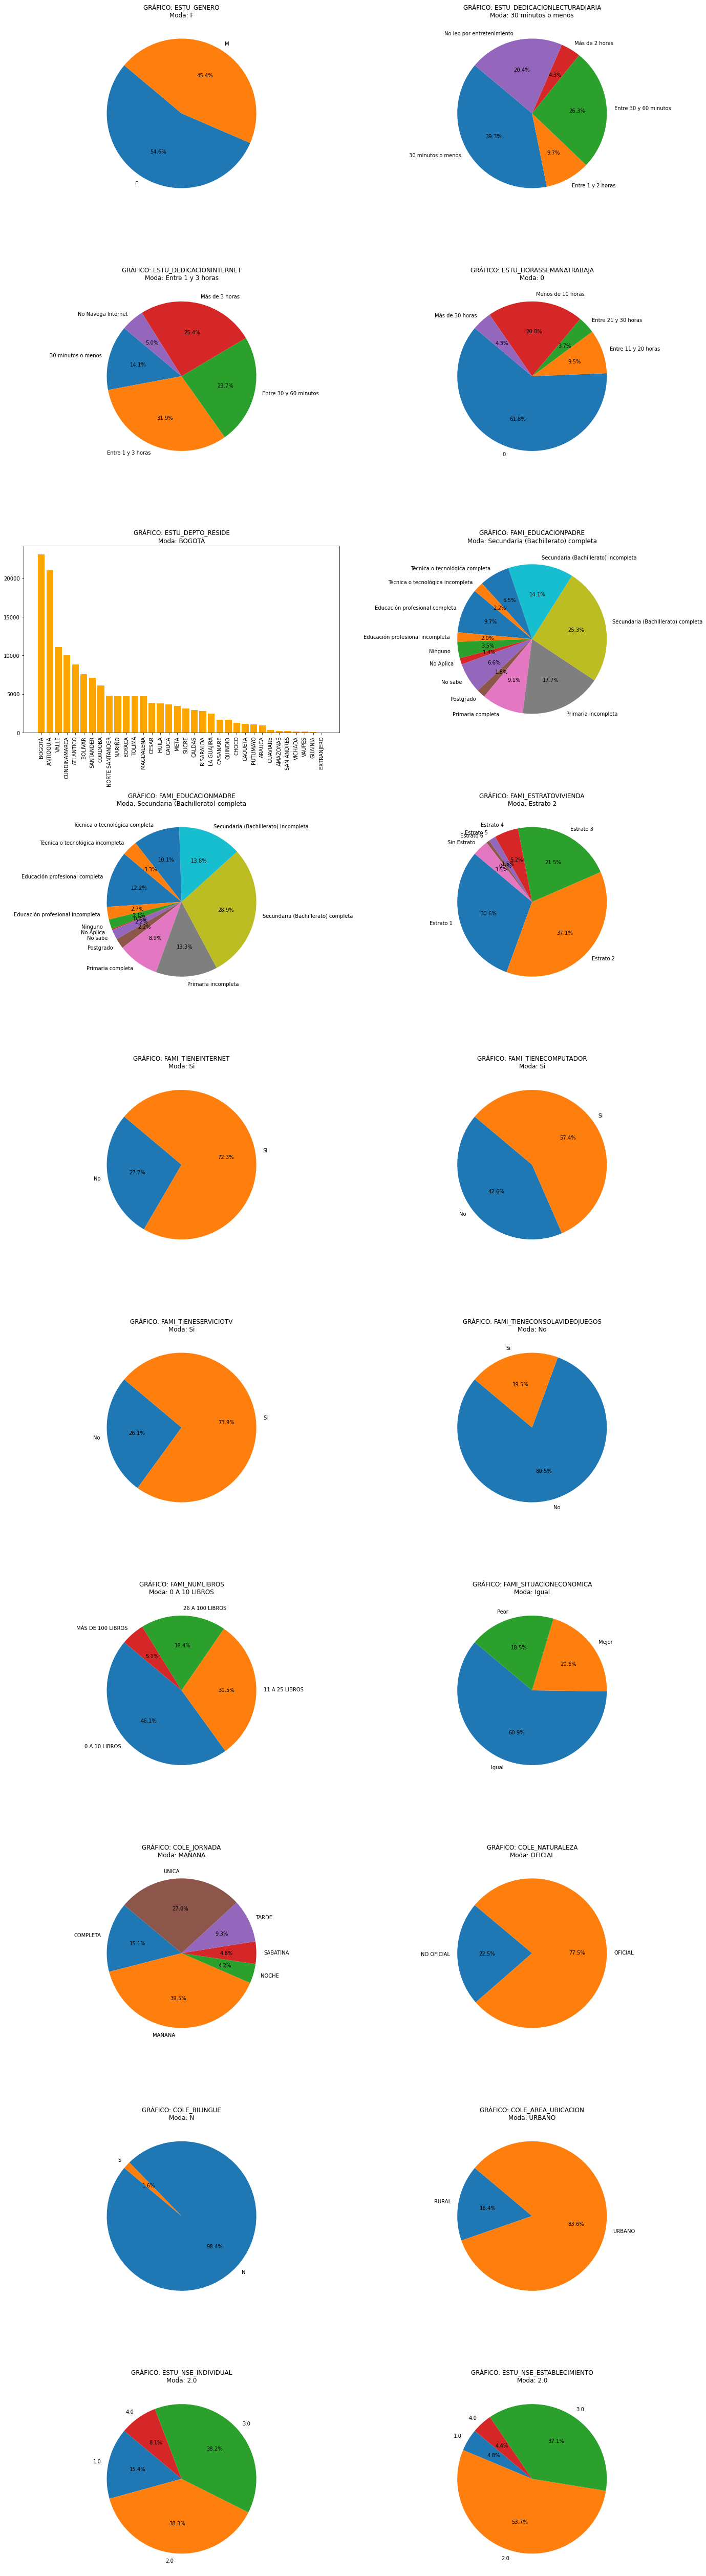

In [23]:
# Grafica de las variables sociodemograficas
graf_sociodemogr(df_wk_sd)

**Comentarios**: 
* La mayoria de las variables presentan distribuciones similares para la mayoria de sus subcategorias, exceptuando la variable de COLE_BILINGUE, en donde los colegios que son bilingues representan menos del 2% de los datos.
* Se observa que respecto a la variable ESTU_DEPTO_RESI algunos departamentos representan un porcentaje muy bajo de los datos, probablemente esto se relaciona con la concentración de la población hacia la región centro y occidente del país, puesto que dichos departamentos están al este.
* Se presenta una distribucón similar entre ESTU_NSE_INDIVIDUAL y ESTU_NSE_ESTABLECIMIENTO.

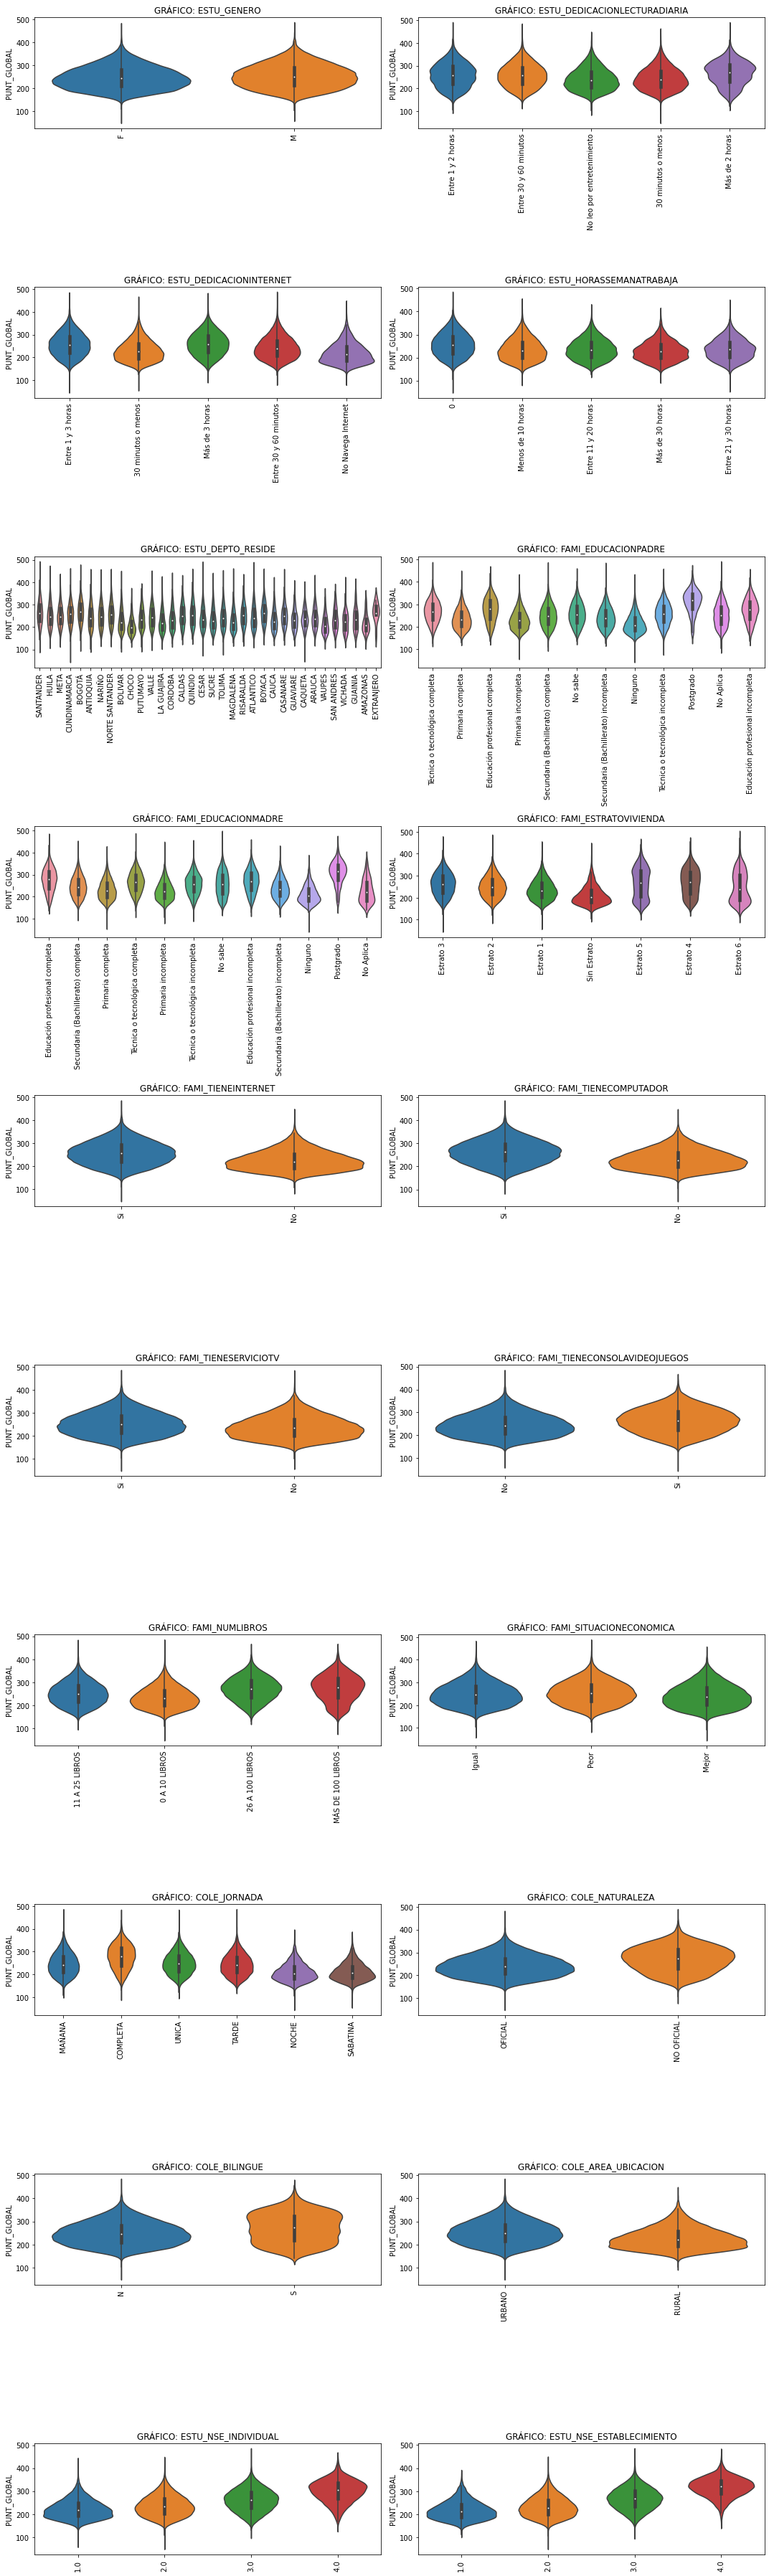

In [24]:
# Gráfica variables sociodemográficas vs puntaje
punt_vs_sociodemogr(df_work, df_wk_sd)

**Comentarios**:
Se analizan a través de diagramas de violin las columnas seleccionadas arbitrariamente y se observa que:
* Columnas como ESTU_GENERO, FAMI_TIENESERVICIOTV, FAMI_SITUACION_ECONOMICA parecen no representar cambios significativos en la variable de interés (PUNT_GLOBAL)
* Las variables FAMI_TIENEINTERNET y FAMI_TIENECOMPUTADOR tienen distribuciones similares y parecen influenciar de manera parecida la variable PUNT_GLOBAL, por lo que se podria pensar que son redundante. Ocurre algo similar con ESTU_NSE_INDIVIDUAL y ESTU_NSE_ESTABLECIMIENTO.
* Las variables que presentan en las subcategorias diferenciación considerable respecto al diagrama tipo violin y por ende, varia su influencia con PUNT_GLOBAL, son: FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, COLE_NATURALEZA, COLE_AREA_UBICACION y ESTU_NSE_INDIVIDUAL(ESTU_NSE_ESTABLECIMIENTO).

A partir de los gráficos presentados y los comentarios realizados, se establece que las siguientes variables pueden ser interesantes para un análisis más detallado, debido a que tienen una mejor distribución de las subcategorias y a que cuando se evaluan vs el PUNT_GLOBAL, muestran variaciones iportantes, lo que permite inferir una posible influencia sobre dicha variable.

In [41]:
columns_sociodemogr_v2 = ['ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_DEPTO_RESIDE',
                          'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 
                          'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 
                          'FAMI_TIENECONSOLAVIDEOJUEGOS','FAMI_NUMLIBROS','COLE_JORNADA',
                          'COLE_NATURALEZA', 'COLE_AREA_UBICACION', 'ESTU_NSE_INDIVIDUAL', ]


# Variable de interés
columns_punt_v2 = ['PUNT_GLOBAL']

columns_wk_v2 = columns_punt_v2 + columns_sociodemogr_v2

df_work_2 = df_work[columns_wk_v2]
df_work_vf2 = df_work_2.copy()

Se determino que para facilidad, algunas variables podrian ser agrupadas por categorias, por lo que a continuación se crean diccionarios para hacer el reemplazo en el dataframe `df_work_vf2`

Imagen de regiones

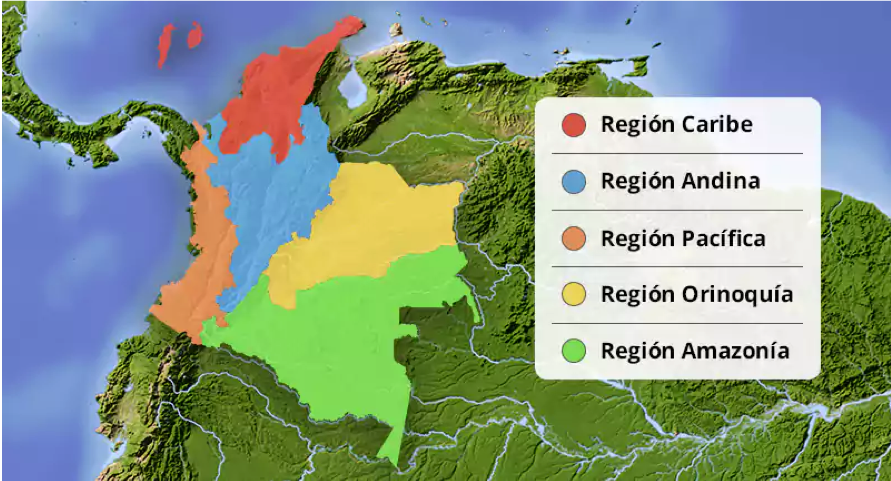

In [42]:
Image(filename='/Users/hectormora/OneDrive - Universidad de los andes/MIAD/C1_1_Laboratorio_computacional/Laboratorio 2/OneDrive_2_9-12-2023/Archivos/regiones.png')

##### Agrupamiento Departamentos en Regiones
Para las regiones se decidió tener en cuenta este mapa y se agruparon los departamentos en las siguientes 4 macro regiones  así:

* Región Andina y Pacífico = ANDIN_PACF
*  Región Caribe e insular = CARIBE
* Región Amazonia y Orinoquia = AMAZ_ORI
* Extranjero = EXTRANJERO

In [43]:
val_unic_dep_res = df_work_vf2['ESTU_DEPTO_RESIDE'].unique()
# val_unic_dep_res

In [44]:
mapper_dpto_resi = {
    'SANTANDER': 'ANDIN_PACF', 'HUILA': 'ANDIN_PACF', 'CUNDINAMARCA': 'ANDIN_PACF' ,
    'BOGOTÁ': 'ANDIN_PACF','ANTIOQUIA': 'ANDIN_PACF','NORTE SANTANDER': 'ANDIN_PACF' ,
    'CALDAS': 'ANDIN_PACF', 'QUINDIO': 'ANDIN_PACF','TOLIMA': 'ANDIN_PACF', 
    'BOYACA': 'ANDIN_PACF', 'RISARALDA': 'ANDIN_PACF', 'NARIÑO': 'ANDIN_PACF', 
    'CHOCO': 'ANDIN_PACF', 'VALLE': 'ANDIN_PACF', 'CAUCA': 'ANDIN_PACF',
    
    'BOLIVAR': 'CARIBE', 'LA GUAJIRA': 'CARIBE', 'CORDOBA': 'CARIBE', 'CESAR': 'CARIBE', 
    'SUCRE': 'CARIBE','MAGDALENA': 'CARIBE', 'ATLANTICO': 'CARIBE', 'SAN ANDRES': 'CARIBE',
    
    
    'PUTUMAYO': 'AMAZ_ORI', 'GUAVIARE': 'AMAZ_ORI', 'CAQUETA': 'AMAZ_ORI', 
    'VAUPES': 'AMAZ_ORI', 'GUAINIA': 'AMAZ_ORI', 'AMAZONAS': 'AMAZ_ORI',
    'CASANARE': 'AMAZ_ORI', 'ARAUCA': 'AMAZ_ORI', 'VICHADA': 'AMAZ_ORI', 'META': 'AMAZ_ORI',
     
    'EXTRANJERO': 'EXTRANJERO'}

df_work_vf2['ESTU_DEPTO_RESIDE'] = df_work_vf2['ESTU_DEPTO_RESIDE'].replace(to_replace=mapper_dpto_resi)

##### Agrupamiento Educación

In [45]:
val_unic_ed = df_work_2['FAMI_EDUCACIONPADRE'].unique()
# val_unic_ed

In [46]:
mapper_ed = {
    'Técnica o tecnológica completa' : 'TECNICA', 'Técnica o tecnológica incompleta': 'TECNICA',
    'Primaria completa': 'PRIMARIA', 'Primaria incompleta': 'PRIMARIA',
    'Secundaria (Bachillerato) completa': 'SECUNDARIA', 'Secundaria (Bachillerato) incompleta': 'SECUNDARIA',
    'Educación profesional completa': 'PREGRADO', 'Educación profesional incompleta': 'PREGRADO',
    'Postgrado': 'POSTGRADO', 
    'No sabe': 'OTRO', 'Ninguno': 'OTRO', 'No Aplica': 'OTRO'
}

df_work_vf2['FAMI_EDUCACIONPADRE'] = df_work_vf2['FAMI_EDUCACIONPADRE'].replace(to_replace=mapper_ed)
df_work_vf2['FAMI_EDUCACIONMADRE'] = df_work_vf2['FAMI_EDUCACIONMADRE'].replace(to_replace=mapper_ed)

In [47]:
df_wk_sd_v2 = df_work_vf2[columns_sociodemogr_v2]
## Recordar los valores unicos de cada variable
for column_wk in df_wk_sd_v2.columns:
    print(column_wk)
    val_unic_wk = df_wk_sd_v2[column_wk].unique()
    print(val_unic_wk)
    print("--------------------------------------")

ESTU_DEDICACIONLECTURADIARIA
['Entre 1 y 2 horas' 'Entre 30 y 60 minutos' 'No leo por entretenimiento'
 '30 minutos o menos' 'Más de 2 horas']
--------------------------------------
ESTU_DEDICACIONINTERNET
['Entre 1 y 3 horas' '30 minutos o menos' 'Más de 3 horas'
 'Entre 30 y 60 minutos' 'No Navega Internet']
--------------------------------------
ESTU_DEPTO_RESIDE
['ANDIN_PACF' 'AMAZ_ORI' 'CARIBE' 'EXTRANJERO']
--------------------------------------
FAMI_EDUCACIONPADRE
['TECNICA' 'PRIMARIA' 'PREGRADO' 'SECUNDARIA' 'OTRO' 'POSTGRADO']
--------------------------------------
FAMI_EDUCACIONMADRE
['PREGRADO' 'SECUNDARIA' 'PRIMARIA' 'TECNICA' 'OTRO' 'POSTGRADO']
--------------------------------------
FAMI_ESTRATOVIVIENDA
['Estrato 3' 'Estrato 2' 'Estrato 1' 'Sin Estrato' 'Estrato 5' 'Estrato 4'
 'Estrato 6']
--------------------------------------
FAMI_TIENECOMPUTADOR
['Si' 'No']
--------------------------------------
FAMI_TIENECONSOLAVIDEOJUEGOS
['No' 'Si']
--------------------------------

In [48]:
df_work_vf2['ESTU_DEDICACIONLECTURADIARIA'] = pd.Categorical(df_work_vf2['ESTU_DEDICACIONLECTURADIARIA'], ['No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas', 'Más de 2 horas'], ordered=True)
df_work_vf2['ESTU_DEDICACIONINTERNET'] = pd.Categorical(df_work_vf2['ESTU_DEDICACIONINTERNET'], ['No Navega Internet', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 3 horas',  'Más de 3 horas'], ordered=True)
df_work_vf2['ESTU_DEPTO_RESIDE'] = pd.Categorical(df_work_vf2['ESTU_DEPTO_RESIDE'], ['ANDIN_PACF', 'CARIBE', 'AMAZ_ORI', 'EXTRANJERO'], ordered=True)
df_work_vf2['FAMI_EDUCACIONPADRE'] = pd.Categorical(df_work_vf2['FAMI_EDUCACIONPADRE'],['PRIMARIA', 'TECNICA', 'SECUNDARIA', 'PREGRADO', 'POSTGRADO', 'OTRO'], ordered=True)
df_work_vf2['FAMI_EDUCACIONMADRE'] = pd.Categorical(df_work_vf2['FAMI_EDUCACIONMADRE'],['PRIMARIA', 'TECNICA', 'SECUNDARIA', 'PREGRADO', 'POSTGRADO', 'OTRO'], ordered=True)
df_work_vf2['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df_work_vf2['FAMI_ESTRATOVIVIENDA'],['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato'], ordered=True)
df_work_vf2['FAMI_TIENECOMPUTADOR'] = pd.Categorical(df_work_vf2['FAMI_TIENECOMPUTADOR'], ['Si', 'No'], ordered=True)
df_work_vf2['FAMI_NUMLIBROS'] = pd.Categorical(df_work_vf2['FAMI_NUMLIBROS'], ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS'], ordered=True)
df_work_vf2['COLE_JORNADA'] = pd.Categorical(df_work_vf2['COLE_JORNADA'], ['COMPLETA', 'UNICA', 'MAÑANA', 'TARDE', 'NOCHE', 'SABATINA'], ordered=True)
df_work_vf2['COLE_NATURALEZA'] = pd.Categorical(df_work_vf2['COLE_NATURALEZA'], ['OFICIAL', 'NO OFICIAL'], ordered=True)
df_work_vf2['COLE_AREA_UBICACION'] = pd.Categorical(df_work_vf2['COLE_AREA_UBICACION'], ['URBANO', 'RURAL'], ordered=True)

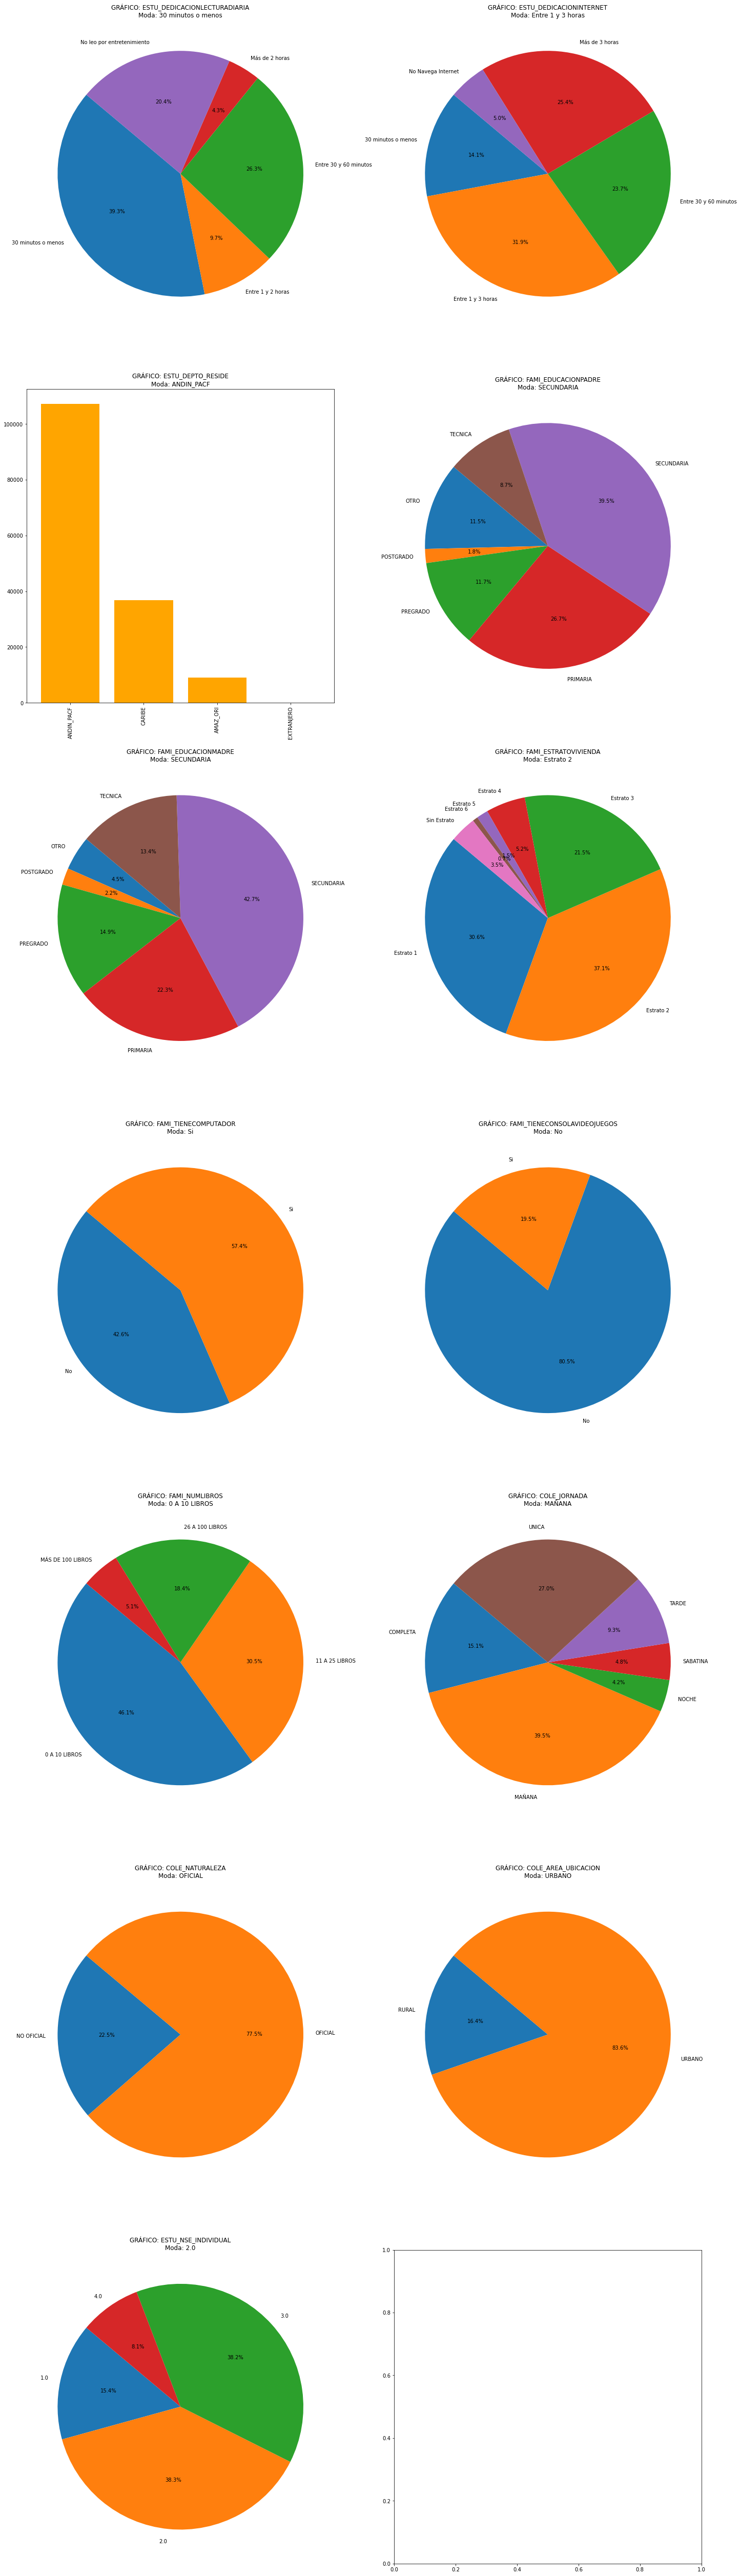

In [49]:
# Gráfica de las variables sociodemograficas
graf_sociodemogr(df_wk_sd_v2)

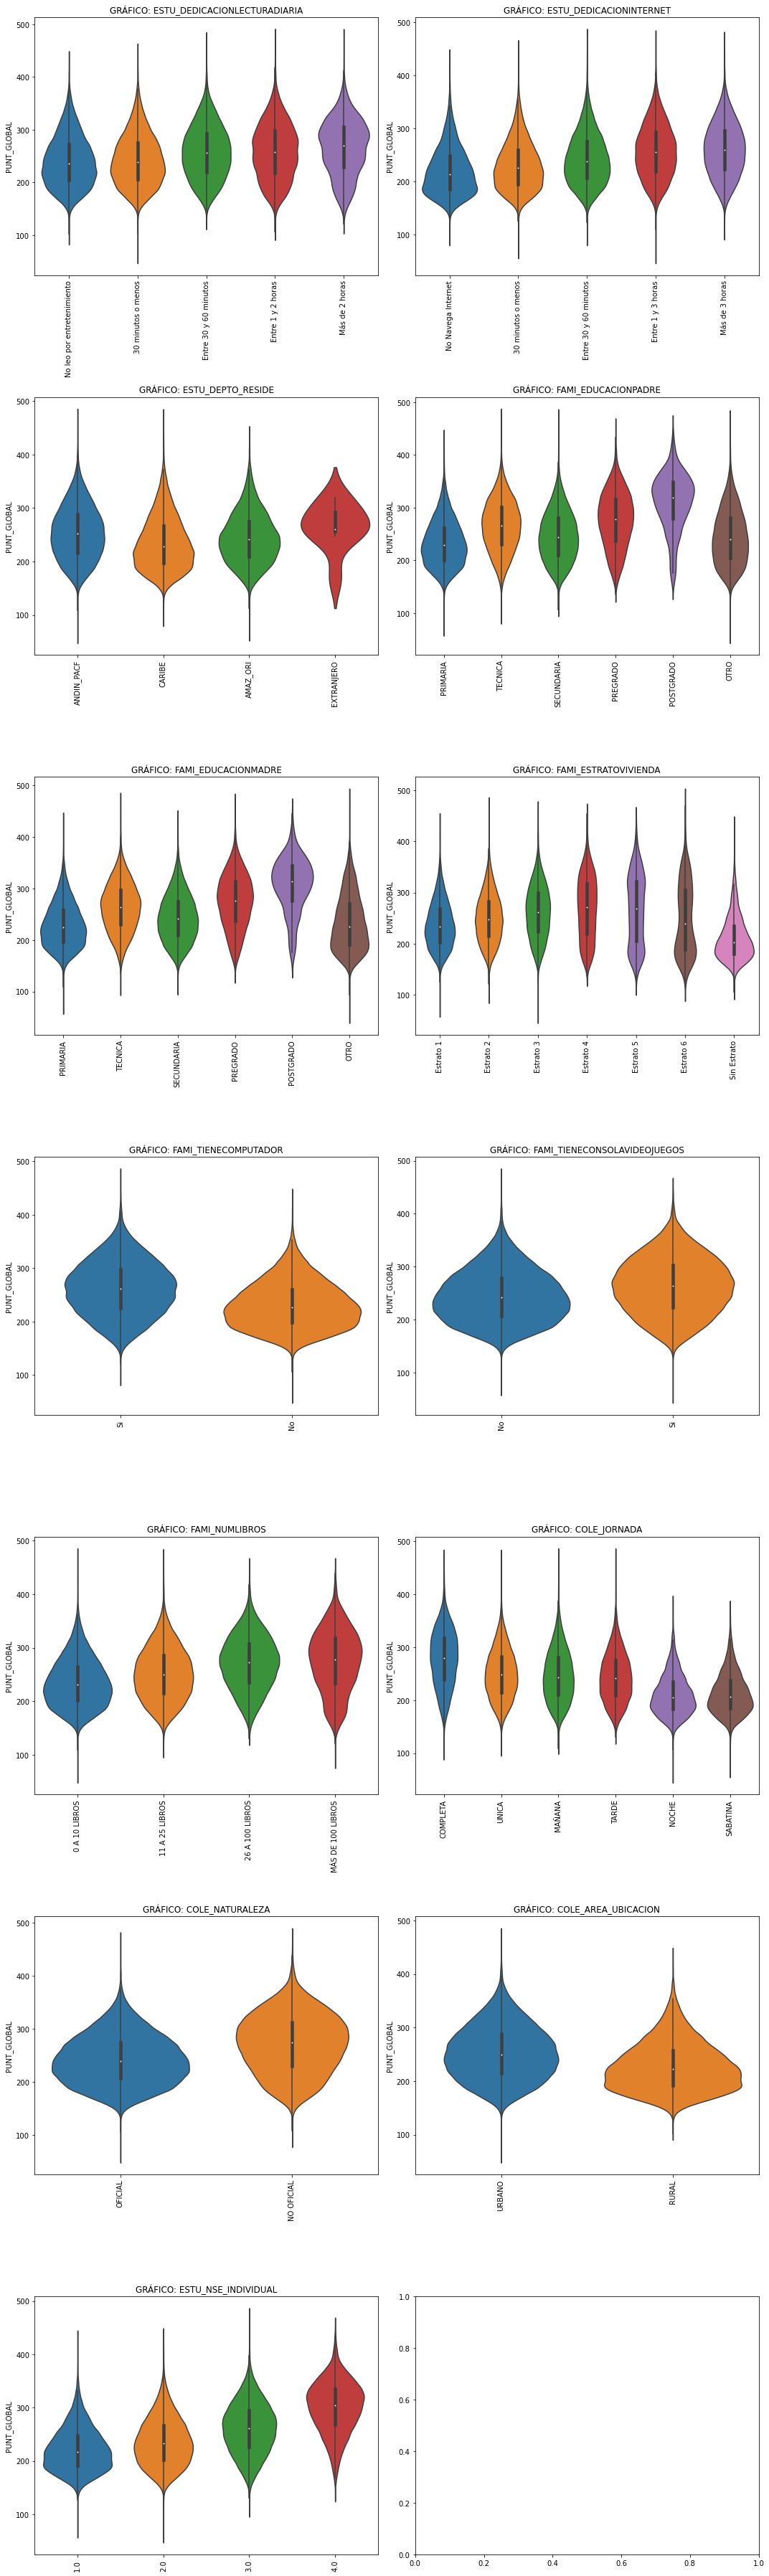

In [50]:
# Gráfica de la variable sociodemográfica vs puntaje
punt_vs_sociodemogr(df_work_vf2, df_wk_sd_v2)

display(HTML("<style>.output_scroll { height: auto !important; }</style>"))


Se calcula la distribución para la variable PUNT_GLOBAL, así como su respectiva Mediana, Media, Varianza y Desviación Estandar para visualizar en que puntajes se concentran los datos

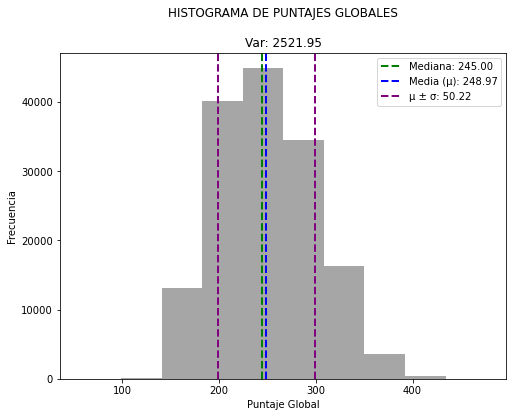

In [51]:
histogr_puntaje(df_work_vf2)

#### Evaluación de la dependencia entre las variables

In [52]:
def dependencia_var_cual(df_work_mol):
    # Crear una matriz chi-cuadrado vacía para almacenar los valores de chi-cuadrado
    chi2_matrix = pd.DataFrame(columns=df_work_mol.columns, index=df_work_mol.columns)

    # Iterar sobre cada par de variables categóricas
    for col1 in df_work_mol.columns:
        for col2 in df_work_mol.columns:
            contingency_table = pd.crosstab(df_work_mol[col1], df_work_mol[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = chi2

    # Convertir los valores de la matriz de chi-cuadrado a tipo numérico
    chi2_matrix = round((chi2_matrix.astype(float)*pow(10,-3)),2)
    #print(chi2_matrix)

    # Crear un mapa de calor para visualizar los valores de chi-cuadrado
    plt.figure(figsize=(10, 8))
    vmin = 0  # Valor mínimo personalizado
    vmax = 27
    sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=vmin, vmax=vmax)

    plt.title('VALORES DE CHI-CUADRADO ENTRE VARIABLES SELECCIONADAS')
    plt.show()

Para evaluar la dependencia entre estas variables categóricas, contenidas en (columns_wk_v2), se utiliza una prueba de chi-cuadrado (χ²), la cual se basa en la hipótesis nula de que no existe una relación significativa entre las variables, es decir, son independientes. Esto nos permite tener una idea de su dependencia con el propósito de evitar posibles errores despues en el modelo.

In [53]:
df_work_mol = df_work_vf2.copy()

In [54]:
df_work_vf2

PUNT_GLOBAL ESTU_DEDICACIONLECTURADIARIA ESTU_DEDICACIONINTERNET  \
2020 0              257            Entre 1 y 2 horas       Entre 1 y 3 horas   
     1              347        Entre 30 y 60 minutos      30 minutos o menos   
     2              245   No leo por entretenimiento          Más de 3 horas   
     3              168           30 minutos o menos          Más de 3 horas   
     4              351        Entre 30 y 60 minutos       Entre 1 y 3 horas   
...                 ...                          ...                     ...   
2022 53274          254           30 minutos o menos       Entre 1 y 3 horas   
     53275          297               Más de 2 horas          Más de 3 horas   
     53276          357        Entre 30 y 60 minutos      30 minutos o menos   
     53277          197        Entre 30 y 60 minutos       Entre 1 y 3 horas   
     53278          290           30 minutos o menos   Entre 30 y 60 minutos   

           ESTU_DEPTO_RESIDE FAMI_EDUCACIONPADRE FAMI_EDUCACIONMADRE  \
2020 0            ANDIN_PACF             TECNICA            PREGRADO   
     1            ANDIN_PACF            PRIMARIA          SECUNDARIA   
     2              AMAZ_ORI            PREGRADO            PREGRADO   
     3            ANDIN_PACF            PRIMARIA            PRIMARIA   
     4            ANDIN_PACF          SECUNDARIA             TECNICA   
...                      ...                 ...                 ...   
2022 53274            CARIBE          SECUNDARIA            PREGRADO   
     53275            CARIBE          SECUNDARIA          SECUNDARIA   
     53276        ANDIN_PACF                OTRO                OTRO   
     53277        ANDIN_PACF            PREGRADO          SECUNDARIA   
     53278        ANDIN_PACF          SECUNDARIA          SECUNDARIA   

           FAMI_ESTRATOVIVIENDA FAMI_TIENECOMPUTADOR  \
2020 0                Estrato 3                   Si   
     1                Estrato 3                   Si   
     2                Estrato 2                   Si   
     3                Estrato 1                   No   
     4                Estrato 3                   Si   
...                         ...                  ...   
2022 53274            Estrato 1                   No   
     53275            Estrato 2                   No   
     53276            Estrato 4                   Si   
     53277            Estrato 1                   Si   
     53278            Estrato 2                   Si   

           FAMI_TIENECONSOLAVIDEOJUEGOS   FAMI_NUMLIBROS COLE_JORNADA  \
2020 0                               No   11 A 25 LIBROS       MAÑANA   
     1                               No   11 A 25 LIBROS     COMPLETA   
     2                               No    0 A 10 LIBROS       MAÑANA   
     3                               No    0 A 10 LIBROS        UNICA   
     4                               No   11 A 25 LIBROS     COMPLETA   
...                                 ...              ...          ...   
2022 53274                           No   11 A 25 LIBROS        UNICA   
     53275                           No  26 A 100 LIBROS        UNICA   
     53276                           No    0 A 10 LIBROS     COMPLETA   
     53277                           No    0 A 10 LIBROS       MAÑANA   
     53278                           No   11 A 25 LIBROS     COMPLETA   

           COLE_NATURALEZA COLE_AREA_UBICACION ESTU_NSE_INDIVIDUAL  
2020 0             OFICIAL              URBANO                 3.0  
     1          NO OFICIAL              URBANO                 3.0  
     2          NO OFICIAL              URBANO                 3.0  
     3             OFICIAL               RURAL                 2.0  
     4          NO OFICIAL              URBANO                 3.0  
...                    ...                 ...                 ...  
2022 53274         OFICIAL              URBANO                 2.0  
     53275         OFICIAL              URBANO                 2.0  
     53276     

Se realiza una prubea de chi-cuadrado entre pares de variables para eliminar aquellas que no sean independientes entre si, pero si dependientes con la variable de interes (PUNT_GLOBAL)

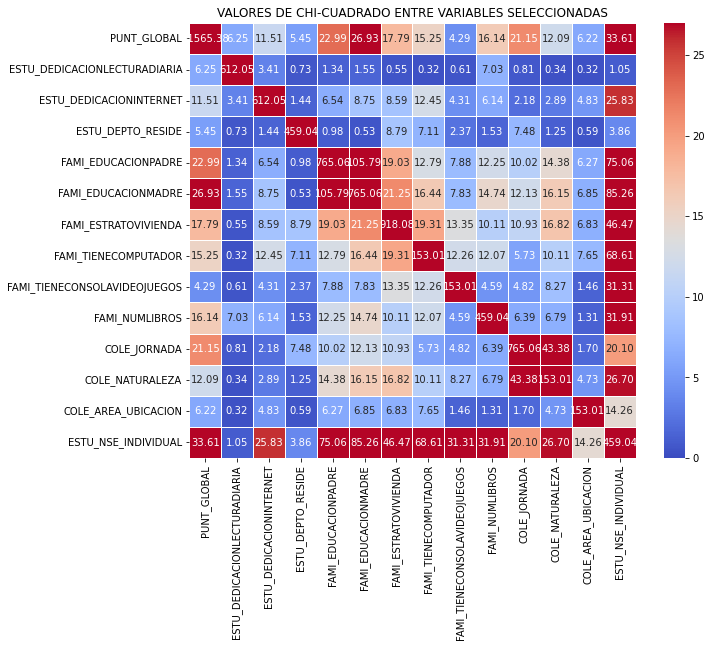

In [55]:
dependencia_var_cual(df_work_vf2)

Se eliminan las siguientes columnas debido a que presentan alta dependencia entre ellas, especialmente con la variable ESTU_NSE_INDIVIDUAL, por lo esta última se mantiene, ya que presenta al parecer más depedencia con la variable PUNT_GLOBAL (variable de interés):

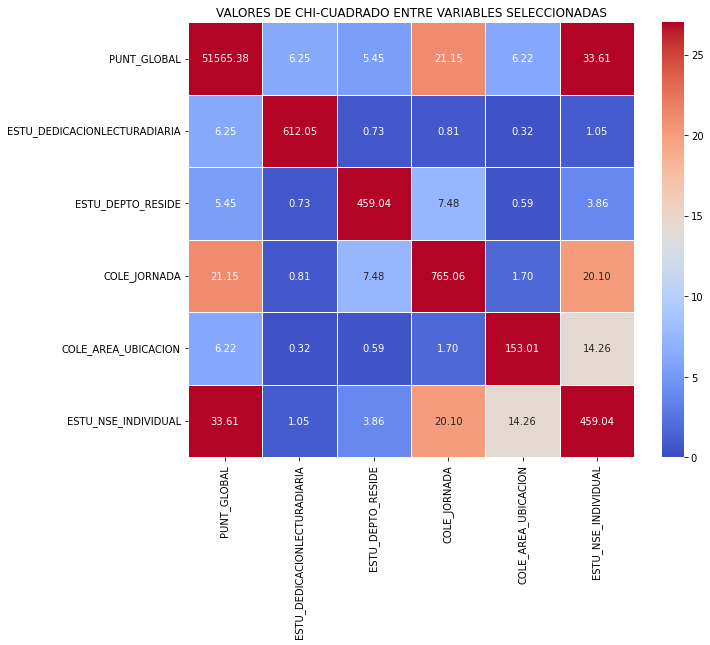

In [56]:
columns_elim = ['FAMI_EDUCACIONPADRE', 'COLE_NATURALEZA', 'FAMI_EDUCACIONMADRE', 'FAMI_ESTRATOVIVIENDA'
                , 'FAMI_TIENECOMPUTADOR', 'FAMI_NUMLIBROS', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 
                'ESTU_DEDICACIONINTERNET']
df_work_mol_f = df_work_mol.copy()
df_work_mol_f.drop(columns_elim, axis=1, inplace=True)

dependencia_var_cual(df_work_mol_f)

## Fase 3: abordar relación variables-desempeño a través de un modelo

In [57]:
df_work_mol_f

PUNT_GLOBAL ESTU_DEDICACIONLECTURADIARIA ESTU_DEPTO_RESIDE  \
2020 0              257            Entre 1 y 2 horas        ANDIN_PACF   
     1              347        Entre 30 y 60 minutos        ANDIN_PACF   
     2              245   No leo por entretenimiento          AMAZ_ORI   
     3              168           30 minutos o menos        ANDIN_PACF   
     4              351        Entre 30 y 60 minutos        ANDIN_PACF   
...                 ...                          ...               ...   
2022 53274          254           30 minutos o menos            CARIBE   
     53275          297               Más de 2 horas            CARIBE   
     53276          357        Entre 30 y 60 minutos        ANDIN_PACF   
     53277          197        Entre 30 y 60 minutos        ANDIN_PACF   
     53278          290           30 minutos o menos        ANDIN_PACF   

           COLE_JORNADA COLE_AREA_UBICACION ESTU_NSE_INDIVIDUAL  
2020 0           MAÑANA              URBANO                 3.0  
     1         COMPLETA              URBANO                 3.0  
     2           MAÑANA              URBANO                 3.0  
     3            UNICA               RURAL                 2.0  
     4         COMPLETA              URBANO                 3.0  
...                 ...                 ...                 ...  
2022 53274        UNICA              URBANO                 2.0  
     53275        UNICA              URBANO                 2.0  
     53276     COMPLETA               RURAL                 3.0  
     53277       MAÑANA              URBANO                 3.0  
     53278     COMPLETA              URBANO                 3.0  

[153013 rows x 6 columns]

### Modelo de Regresión Logística

In [76]:
def mod_regresion_logistiva(df_work_mol_f,pto_corte, test_size):
    
    df_rl = df_work_mol_f.copy()
    df_rl['PORC_PUNT_GL'] = df_rl['PUNT_GLOBAL'].apply(lambda x: x/500)
    df_rl['PUN_ALTO'] = df_rl['PORC_PUNT_GL'].apply(lambda x: 1 if x > pto_corte else 0)
    df_rl.drop(['PORC_PUNT_GL', 'PUNT_GLOBAL'], axis=1, inplace=True)

    # Creamos X y y
    y = df_rl.loc[:,'PUN_ALTO']
    X = df_rl.drop(['PUN_ALTO'], axis=1, inplace=True)

    X_col = df_rl.select_dtypes(include=["category"]).columns
    X_dummies = pd.get_dummies(df_rl, columns=X_col, drop_first=True)

    # Crear el modelo de regresión logística
    # Creamos conjuntos de datos para entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=test_size)

    # Declaramos una instancia del modelo
    lr = LogisticRegression()

    # Entrenamos el modelo
    lr.fit(X_train, y_train)

    # Utilizamos el modelo para predecir
    y_pred = lr.predict(X_test)
    #print(X_test)

    # Verificamos la precisión del modelo
    prec = lr.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Crear un mapa de calor para visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Valores")
    plt.ylabel("True valores")
    plt.title("Matriz de Confusión")
    plt.show()
    
    recall = recall_score(y_test, y_pred)
    
    return (prec, accuracy, recall)

Como es un modelo de clasificación se va a clasificar en desempeño bueno o malo, siendo el punto de corte 0.65. Es decir, aquellos que obtuvieron más del 65% del puntaje, son considerados con un buen desempeño, en caso contrario, mal desempeño.

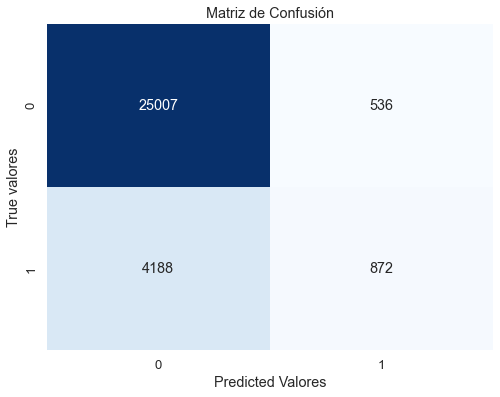

In [78]:
pto_corte = 0.60
test_size = 0.2

rendimiento = mod_regresion_logistiva(df_work_mol_f, pto_corte, test_size)

In [81]:
print(f'Se evaluó el modelo y se obtuvo que la precisión es de: {rendimiento[0]}, el accuracy de: {rendimiento[1]} y el recall de :{rendimiento[2]}, también se puede visualizar la Matriz de Confusión para el caso de un pto de corte de 0.60')

Se evaluó el modelo y se obtuvo que la precisión es de: 0.8456360487533902, el accuracy de: 0.8456360487533902 y el recall de :0.17233201581027668, también se puede visualizar la Matriz de Confusión para el caso de un pto de corte de 0.60


Para evaluar el rendimiento del modelo y entender cómo está haciendo las predicciones en función de los resultados verdaderos y predichos, se calculó la precisión, accuracy y el recall. En este caso se observa que la precisión y accuracy tienen valores altos, mientras que el recall presenta un valor bajo, esto puede indicar que hay un desequilibrio entre las categorias, por lo que se concluye que se deben analizar mejor las variables y modificar el modelo.

## Fase 4: HERRAMIENTA INTERACTIVA DE ANÁLISIS

Esta herramienta interactiva se realiza asumiendo que el modelo predice de manera satisfactoria. Cabe resaltar que las indicaciones al usuario están en letra cursiva.

### Construcción de la herramienta interactiva

In [82]:
import plotly.graph_objects as go
import panel as pn

# Cargar la extensión de Plotly en Panel
pn.extension('plotly')

In [93]:
def cambio_corte(info_control):
    seleccion_corte.clear_output()
    with seleccion_corte:
        print("Usted designó un valor de punto de corte de: "+" "+ str(info_control['new']))
        global score
        global df_temp_c
        df_rl = df_work_mol_f.copy()
        df_rl['PORC_PUNT_GL'] = df_rl['PUNT_GLOBAL'].apply(lambda x: x/500)
        df_rl['PUN_ALTO'] = df_rl['PORC_PUNT_GL'].apply(lambda x: 1 if x > info_control['new'] else 0)

        df_rl_HI = df_rl.copy()

        df_rl.drop(['PORC_PUNT_GL', 'PUNT_GLOBAL'], axis=1, inplace=True)
        # Creamos X y y
        y = df_rl.loc[:,'PUN_ALTO']
        X = df_rl.drop(['PUN_ALTO'], axis=1, inplace=True)

        X_col = df_rl.select_dtypes(include=["category"]).columns
        X_dummies = pd.get_dummies(df_rl, columns=X_col, drop_first=True)

        # Crear el modelo de regresión logística
        # Creamos conjuntos de datos para entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2)
        # Declaramos una instancia del modelo
        lr = LogisticRegression()

        # Entrenamos el modelo
        lr.fit(X_train, y_train)
        # Utilizamos el modelo para predecir
        y_pred = lr.predict(X_test)
        score = lr.score(X_test, y_test)
        print('Con ese valor se obtiene una precisión de:' + " " + str(score))
        
        accuracy = accuracy_score(y_test, y_pred)
        print('Con ese valor se obtiene un accuracy de:' + " " + str(score))
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        print('Y se tiene la siguiente matriz de confusión:')
        # Crear un mapa de calor para visualizar la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.set(font_scale=1.2)
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Valores")
        plt.ylabel("True valores")
        plt.title("Matriz de Confusión")
        plt.show()


    
        df_temp = df_rl_HI[df_rl_HI['PUN_ALTO'] == 1]
        df_temp_c = df_temp.copy()
        df_temp_c.drop(['PUNT_GLOBAL', 'PORC_PUNT_GL', 'PUN_ALTO'], axis=1, inplace=True)
        #graf_sociodemogr(df_temp_c)
    

def create_pie_chart(column_name):
    selected_column = df_work[column_name]
    value_counts = selected_column.value_counts()
    percentages = (value_counts / value_counts.sum() * 100).round(2)
    labels = [f'{label} ({percentage}%)' for label, percentage in zip(value_counts.index, percentages)]
    pie_chart = value_counts.hvplot.pie(labels=labels, title=f'Pie Chart for {column_name}')
    return pie_chart

In [94]:
# Se crean los objetos interactivos
barra_deslizante_corte = widgets.FloatSlider(min = 0.3, max = 0.95, step = 0.05)
seleccion_corte = widgets.Output()

barra_deslizante_corte.observe(cambio_corte, names='value')

**Intrucción 1:** 
*A continuación, podra utilizar la herramienta interactiva, la cual usa un modelo de regresión logística para clasificar a los estudiantes en buen desempeño o mal desempeño respecto al puntaje global del examen ICFES, de acuerdo a un umbral o punto de corte que puede modificar a su elección entre los valores de 0.3 y 0.95. Por lo que si, en un caso hipotetico, determina como 0.6 el punto de corte, quiere decir que considera a los estudiantes que tienen un puntaje mayor al 60% (300 puntos) de los 500 puntos (puntaje máximo) como que tienen buen desempeño*

*Cabe resaltar que si no está familiarizado con Jupyter Notebook, para continuar utilizando la herramienta interactiva, deberá dar click a la casilla de Run en cada celda, esta opción está representada por un triángulo en posición horizontal*

*Por favor, deslice hasta ubicar el valor deseado*

In [95]:
barra_deslizante_corte

FloatSlider(value=0.3, max=0.95, min=0.3, step=0.05)

In [96]:
seleccion_corte

Output()

**Intrucción 2:** 
*Tenga en cuenta que estos resultados de desempeño del modelo pueden ser interpretados como, entre valores más altos se tenga en los valores de precisión y accurcay mejor es el modelo*

In [97]:
filt_puntaje = (barra_deslizante_corte.value)*500
#filt_puntaje

In [98]:
df_work_vs = df_work[df_work['PUNT_GLOBAL'] > filt_puntaje]
seleccion_cl = pn.widgets.Select(name='Columna sociodemográfica',
                              options=df_work_vs.columns.tolist())
# Le decimos a panel que nuestro gráfico depende de cambios en el párametro seleccion.
@pn.depends(seleccion_cl.param.value)

# Definimos la función que se encarga de la interactividad del tablero de control.
def funcion_interactiva(seleccion_cl): 

    # Cargamos los datos.
    #df_work_vs = datos 
    # Creamos un filtro de datos que utiliza valores de la lista desplegable.
    # Agrupamos los datos por estación de llegada para poder contrarlos.
    porcentajes = df_work_vs[seleccion_cl].value_counts(normalize=True) * 100

    # Crear el gráfico de pastel
    fig = go.Figure(
        data=[go.Pie(
            labels=porcentajes.index,  # Etiquetas de las categorías
            values=porcentajes.values,  # Valores de las categorías (porcentajes)
            title='Gráfico de Pastel de Porcentajes',  # Título del gráfico
        )]
    )
    
    return fig

In [89]:
tablero_control = pn.Row(pn.Column('### Tablero Variables Sociodemográficas', seleccion_cl), funcion_interactiva)

**Intrucción 3:** 

*A continuación, puede obtener los porcentajes de cada subcategoria para la variable categórica que desee. Por favor seleccione en la lista desplegable la variables y a la derecha encontrará el gráfico pastel para ver su distribución*

In [90]:
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Columna sociodemográfica'..., options=['ESTU_GENERO', ...], value='ESTU_GENERO')
    [1] ParamFunction(function, _pane=Plotly, defer_load=False)

**Intrucción 4:** 

*Muchas gracias por usar esta herramienta interactiva, esperamos que le haya sido de utilidad.*

**Comentario** Esta herramienta le permite al usuario especificar un umbral para considerar a los estudiantes con buen desempeño o no, así como visualizar respecto a esa selección la distribución de las diferentes subcategorias. Por lo que es muy util para estudiar como el puntaje global se relaciona con condiciones socioeconomicas especificas, así como también puede tener otras aplicaciones como por ejemplo para la asignación de becas, ya que permite visualizar como quedaria aproximadamente la población con x umbral de puntaje.